<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2004%20-%20Multistep%20Methods/403_Adams%20Moulton%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adams Moulton
#### John S Butler 
john.s.butler@tudublin.ie  
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)


The Adams Moulton method is an implicit multistep method. This notebook illustrates the 2 step Adams Moulton method for a linear initial value problem of the form
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 2)\end{equation}
with the initial condition
\begin{equation}y(0)=1.\end{equation}
The video below walks through the notebook.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/L1IrVMykC6k" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/Users/johnbutler/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Python Libraries

In [2]:
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings



### Defining the function
\begin{equation} f(t,y)=t-y.\end{equation}

In [3]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a\leq t \leq b$  and number of steps  $N$ 
\begin{equation}h=\frac{b−a}{N}.\end{equation}
 
This gives the discrete time steps,
\begin{equation}t_i=t_0+ih,\end{equation}
where  $t_0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
\begin{equation}h=\frac{2−0}{4}=0.5.\end{equation}
 
This gives the discrete time steps,
\begin{equation}t_i=0+i0.5,\end{equation}
for  $i=0,1,⋯,4.$

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

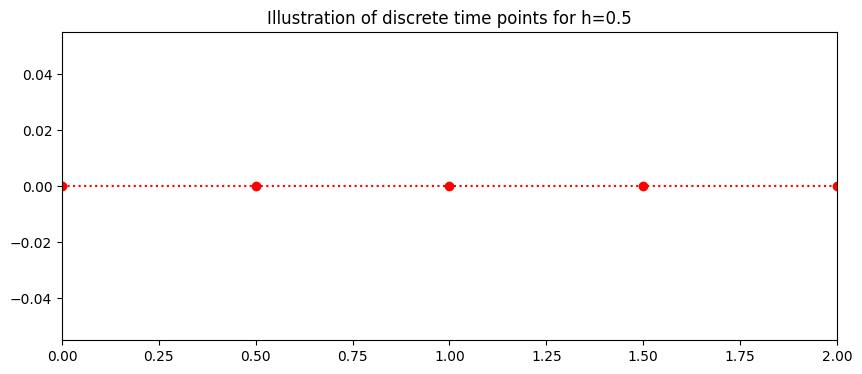

In [4]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Exact Solution
The initial value problem has the exact solution
\begin{equation}y(t)=2e^{-t}+t-1.\end{equation}
The figure below plots the exact solution.

Text(0.5, 0, 'time')

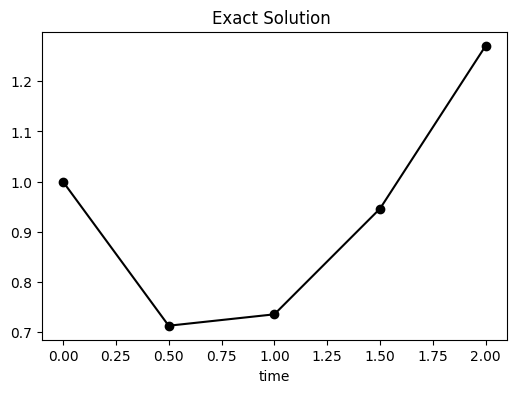

In [5]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

## 2-step Adams Moulton

The general 2-step Adams Moulton difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(5f(t_{i+1},w_{i+1})+8f(t_{i},w_{i})-f(t_{i-1},w_{i-1})). \end{equation}
For the specific intial value problem the 2-step Adams Moiulton difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(5(t_{i+1}-w_{i+1})+8(t_{i}-w_{i})-(t_{i-1}-w_{i-1})). \end{equation}

for $i=0$ the difference equation is:
\begin{equation}w_{1} = w_{0} + \frac{h}{12}(5(t_{1}-w_{1})+8(t_{0}-w_{0})-(t_{-1}-w_{-1})).\end{equation}

this is not solvable as <font color='red'> $w_{1}, \ w_{-1}$ </font> are unknown.
for $i=1$ the difference equation is:
\begin{equation}w_{2} = w_{1} + \frac{h}{12}(5(t_{2}-w_{2})+8(t_{1}-w_{1})-(t_{0}-w_{0})). \end{equation}
this is not solvable as <font color='red'> $w_{1}$ and $w_{2}$ </font> are unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
\begin{equation}w_1=2e^{-t_1}+t_1-1.\end{equation}
As the intial value problem is linear the difference equation can be rearranged such that $w_2$ is on the right hand side:
\begin{equation}w_{2}+\frac{5h}{12}w_{2} = w_{1} + \frac{h}{12}(5(t_{2})+8f(t_{1}-w_{1})-(t_{0}-w_{0})), \end{equation}
\begin{equation}w_{2} = \frac{w_{1} + \frac{h}{12}(5(t_{2})+8f(t_{1}-w_{1})-(t_{0}-w_{0}))}{1+\frac{5h}{12}}. \end{equation}


In [6]:
### Initial conditions
w=np.zeros(len(t))
w[0]=IC
w[1]=y[1] # NEEDED FOR THE METHOD

### Loop

In [7]:
for k in range (1,N):
    w[k+1]=(w[k]+h/12.0*(5*t[k+1]+8*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1])))/(1+5*h/12)   

### Plotting solution

In [8]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'s:',color='blue',label='Adams-Moulton')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the 2 step Adams-Moulton approximation (red) of the intial value problem

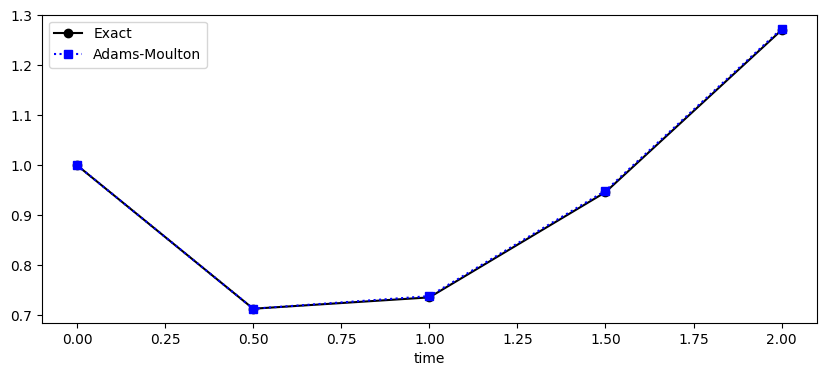

In [9]:
plotting(t,w,y)

## Local Error 
The Error for the 2 step Adams Moulton is:
\begin{equation}y_{n+1}=y_n+\frac{h}{12}[5f(t_{n+1},w_{n+1})+8f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{-h^4}{24}y^{(4)}(\eta),\end{equation}
where $\eta \in [t_{n-1},t_{n+1}]$.

Rearranging the equations gives 
\begin{equation}\frac{y_{n+1}-y_{n}}{h}=\frac{1}{12}[5f(t_{n+1},w_{n+1})+8f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{-h^3}{24}y^{(4)}(\eta),\end{equation}
For our specific initial value problem the error is of the form:
\begin{equation}\frac{-h^3}{24}y'''(\eta)=\frac{h^3}{24}2e^{-\eta} \leq\frac{(0.3)^3}{24} 2\leq 0.01042.\end{equation}

In [10]:


d = {'time t_i': t, 'Adams Bashforth w_i': w,'Exact y(t_i)':y,'Error |y(t_i)-w_i|':np.abs(y-w),'LTE':round(2*0.5**3/24,5)}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Bashforth w_i,Exact y(t_i),Error |y(t_i)-w_i|,LTE
0,0.0,1.000000,1.000000,0.000000,0.01042
1,0.5,0.713061,0.713061,0.000000,0.01042
2,1.0,0.738241,0.735759,0.002482,0.01042
3,1.5,0.949135,0.946260,0.002875,0.01042
4,2.0,1.273255,1.270671,0.002585,0.01042
